In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfo = pd.read_csv("parkinsons.data")

In [3]:
dfo.shape

(195, 24)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = dfo.drop(['name','status'],axis =1)
y = dfo['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
SS = StandardScaler()
MMS = MinMaxScaler()

In [7]:
x_train = SS.fit_transform(X_train)
x_test = SS.fit_transform(X_test)

# USING RANDOM FOREST 

In [8]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=105)

In [9]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=105)

In [10]:
pred = RFC.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
print(confusion_matrix(y_test,pred))

[[ 9  8]
 [ 0 48]]


In [21]:
from sklearn.utils.multiclass import unique_labels

In [23]:
unique_labels(y_test)

array([0, 1], dtype=int64)

In [32]:
def plot(y_test,pred):
    labels=unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table=pd.DataFrame(confusion_matrix(y_test,pred), 
                      columns=column , index=indices)
    return table
    
    

In [33]:
plot(y_test,pred)

,Predicted 0,Predicted 1
Actual 0,9,8
Actual 1,0,48


In [34]:
def plot2(y_test,pred):
    labels=unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table=pd.DataFrame(confusion_matrix(y_test,pred), 
                      columns=column , index=indices)
    return sns.heatmap(table, annot=True , fmt='d' , cmap='viridis')

<Axes: >

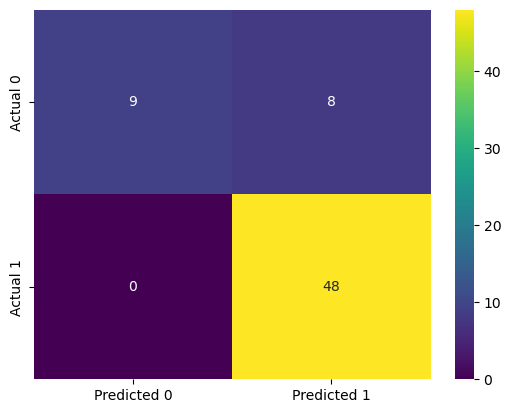

In [35]:
plot2(y_test,pred)

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69        17
           1       0.86      1.00      0.92        48

    accuracy                           0.88        65
   macro avg       0.93      0.76      0.81        65
weighted avg       0.89      0.88      0.86        65



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)


0.8769230769230769

# USING KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [41]:
#GETTING K VALUE WITH LEAST ERRORS
error_rate = []
K = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [42]:
error_rate

[0.1076923076923077,
 0.09230769230769231,
 0.16923076923076924,
 0.15384615384615385,
 0.15384615384615385,
 0.18461538461538463,
 0.13846153846153847,
 0.15384615384615385,
 0.12307692307692308,
 0.13846153846153847,
 0.13846153846153847,
 0.12307692307692308,
 0.16923076923076924,
 0.18461538461538463,
 0.18461538461538463,
 0.18461538461538463,
 0.16923076923076924,
 0.18461538461538463,
 0.18461538461538463,
 0.18461538461538463,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2153846153846154,
 0.2153846153846154,
 0.23076923076923078,
 0.23076923076923078,
 0.24615384615384617,
 0.23076923076923078,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155,
 0.26153846153846155]

Minimum error:- 0.09230769230769231 at K = 1


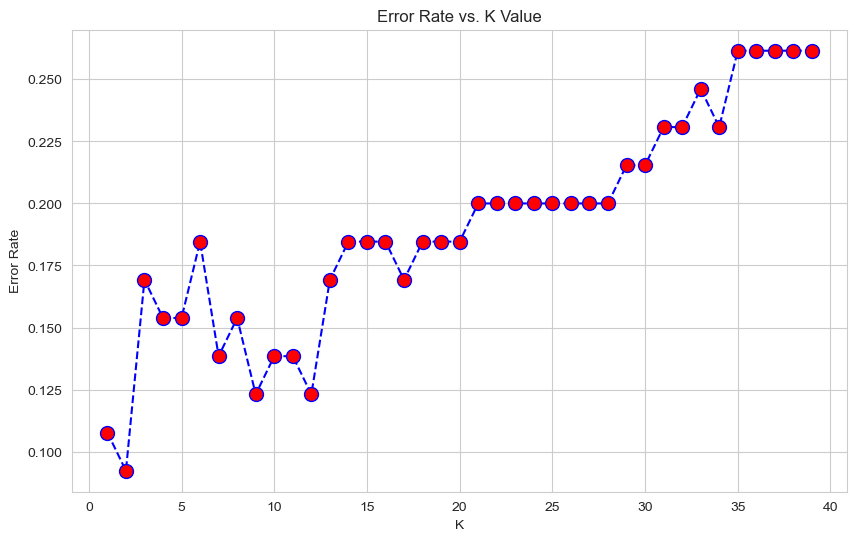

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [50]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.9076923076923077 at K = 1


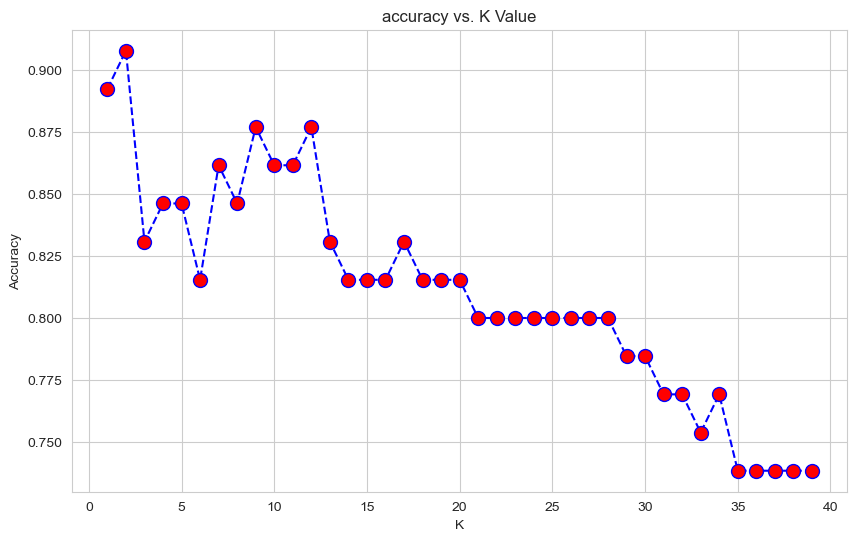

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
predict = knn.predict(x_test)

In [56]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.98      0.88      0.92        48

    accuracy                           0.89        65
   macro avg       0.85      0.91      0.87        65
weighted avg       0.91      0.89      0.90        65



In [57]:
knn.score(x_test,y_test)

0.8923076923076924

In [58]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.88      0.93        48

    accuracy                           0.91        65
   macro avg       0.87      0.94      0.89        65
weighted avg       0.93      0.91      0.91        65



In [60]:
knn.score(x_test,y_test)

0.9076923076923077

# USING LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)

In [90]:
LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [91]:
pred1 = LR.predict(x_test)

In [65]:
pred1

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [66]:
x_test

array([[ 0.51263844, -0.09795882,  0.92780154, ...,  0.5567087 ,
         0.03147182, -0.39383713],
       [-1.20339893, -0.81139782, -0.61678308, ..., -0.46547203,
        -1.26213644,  0.2073963 ],
       [ 1.3216278 ,  0.2722459 , -0.59351855, ..., -1.69369456,
        -0.12300943, -1.11650354],
       ...,
       [-1.02340152, -0.86225894, -0.45022788, ..., -0.32734624,
        -0.66177624, -0.12772199],
       [ 1.32153699,  0.52352223, -0.81912514, ...,  1.53338771,
         1.19168218,  0.4455287 ],
       [-0.29580604, -0.51049226, -1.04505911, ..., -0.60728783,
        -0.7346092 , -0.39246474]])

In [67]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.90      0.96      0.93        48

    accuracy                           0.89        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.89      0.89      0.89        65



<Axes: >

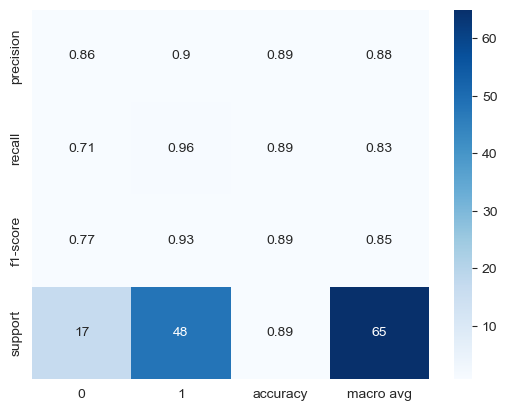

In [96]:
# Generate a classification report and convert it to a dataframe
report = classification_report(y_test, pred1, output_dict=True)
df = pd.DataFrame(report).transpose()

# Plot a heatmap of the classification report dataframe
sns.heatmap(df.iloc[:-1, :].T, annot=True, cmap='Blues')

In [68]:
LR.score(x_test,y_test)

0.8923076923076924

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)


0.8923076923076924